In [1]:
# Import libraries
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv("mental_health_dataset.csv")  # Replace with actual file path
print("✅ Dataset loaded. Shape:", df.shape)
print("🔎 First 5 rows:\n", df.head())

✅ Dataset loaded. Shape: (1000, 12)
🔎 First 5 rows:
    User_ID  Age      Gender  Occupation    Country Mental_Health_Condition  \
0        1   36  Non-binary       Sales     Canada                      No   
1        2   34      Female   Education         UK                     Yes   
2        3   65  Non-binary       Sales        USA                     Yes   
3        4   34        Male       Other  Australia                      No   
4        5   22      Female  Healthcare     Canada                     Yes   

  Severity Consultation_History Stress_Level  Sleep_Hours  Work_Hours  \
0   Medium                  Yes       Medium          7.1          46   
1      NaN                   No          Low          7.5          47   
2     High                   No          Low          8.4          58   
3      Low                   No       Medium          9.8          30   
4      Low                   No       Medium          4.9          62   

   Physical_Activity_Hours  
0         

In [2]:
# Check for null values in each column
null_counts = df.isnull().sum()
print("🔍 Null values per column:\n", null_counts)

🔍 Null values per column:
 User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64


In [3]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include='object').columns

# Fill nulls in numerical columns with median
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Fill nulls in categorical columns with mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

print("✅ Null values cleaned. Here's the new null count:\n", df.isnull().sum())

✅ Null values cleaned. Here's the new null count:
 User_ID                    0
Age                        0
Gender                     0
Occupation                 0
Country                    0
Mental_Health_Condition    0
Severity                   0
Consultation_History       0
Stress_Level               0
Sleep_Hours                0
Work_Hours                 0
Physical_Activity_Hours    0
dtype: int64


📦 Outlier Detection Summary:
 - Age: 0 outliers


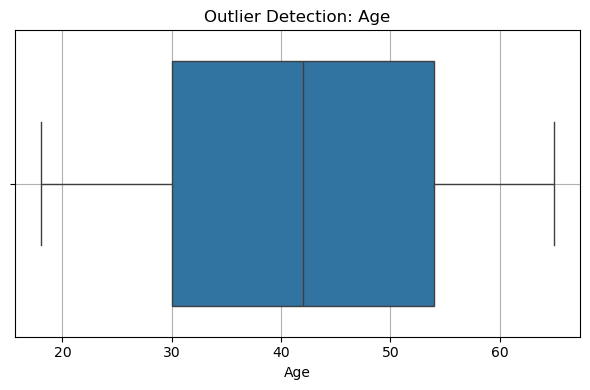

 - Sleep_Hours: 0 outliers


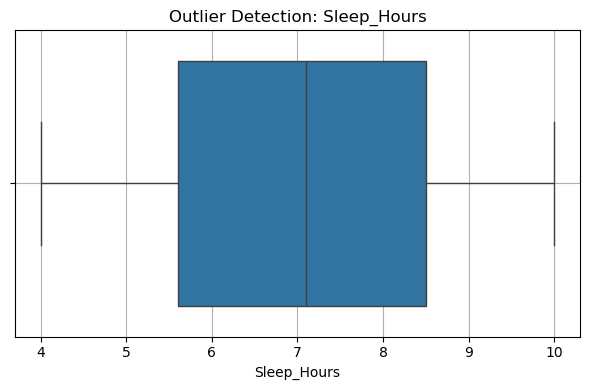

 - Work_Hours: 0 outliers


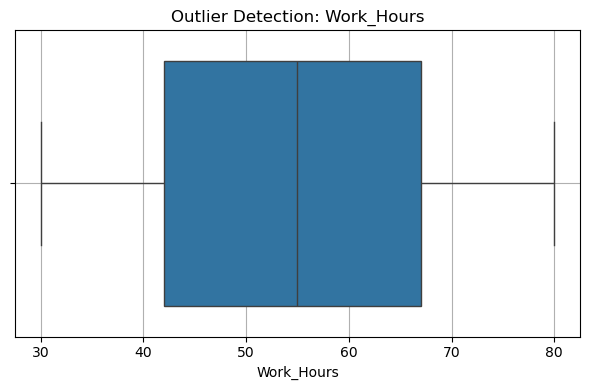

 - Physical_Activity_Hours: 0 outliers


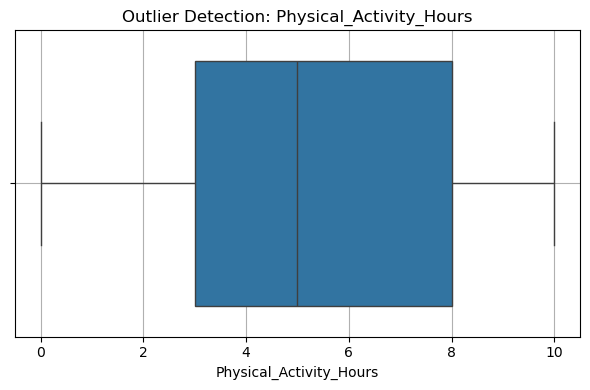

In [4]:
# Step 4: Outlier Detection (Boxplot + IQR)
import matplotlib.pyplot as plt
import seaborn as sns

# Columns from your dataset
numerical_cols = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']

print("📦 Outlier Detection Summary:")

for col in numerical_cols:
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Detect and count outliers
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f" - {col}: {len(outliers)} outliers")

    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection: {col}")
    plt.xlabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


🔍 Unique values in Mental_Health_Condition column: ['No' 'Yes']
✅ Label distribution:
 Mental_Health_Condition
0    485
1    515
Name: count, dtype: int64


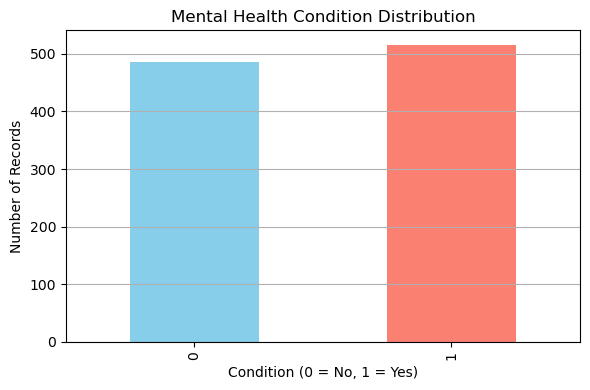

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Step 2: Check if target column is already binary
print("🔍 Unique values in Mental_Health_Condition column:", df['Mental_Health_Condition'].unique())

# Step 3: If not already binary (e.g., 'Yes', 'No'), convert to 0 and 1
if df['Mental_Health_Condition'].dtype == 'object':
    df['Mental_Health_Condition'] = df['Mental_Health_Condition'].map({'No': 0, 'Yes': 1})

# Step 4: Print label distribution
label_counts = df['Mental_Health_Condition'].value_counts().sort_index()
print("✅ Label distribution:\n", label_counts)

# Step 5: Plot the label distribution
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Mental Health Condition Distribution')
plt.xlabel('Condition (0 = No, 1 = Yes)')
plt.ylabel('Number of Records')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [6]:
x = df.iloc[:, :-1]  # Selects all columns except the last (features)
y = df.iloc[:, -1]   # Selects only the last column (label/target)

print(x.shape)
print(y.shape)


(1000, 11)
(1000,)


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 1. Load your dataset (assuming you already have it as df)
x = df.copy()  # Or select specific features: x = df[['Age', 'Gender', ..., 'Stress_Level']]

# 2. Identify categorical columns
non_numeric_cols = x.select_dtypes(include=['object', 'category']).columns

# 3. Label encode all categorical columns
le = LabelEncoder()
for col in non_numeric_cols:
    x[col] = le.fit_transform(x[col])

# 4. Apply standard scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

print("✅ Feature scaling applied using Z-score normalization.")


✅ Feature scaling applied using Z-score normalization.


In [8]:
from sklearn.model_selection import train_test_split

# Split the scaled features and target
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Print shape of train and test sets
print("✅ Data successfully split:")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

✅ Data successfully split:
x_train shape: (800, 12)
x_test shape: (200, 12)
y_train shape: (800,)
y_test shape: (200,)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# STEP 1: Train Random Forest directly on multi-class target
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# STEP 2: Predict on test set
y_pred_rf = rf_model.predict(x_test)

# STEP 3: Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')  # handles multi-class
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("📊 Random Forest Classifier Performance (Multi-class):")
print(f"Accuracy Score:  {accuracy_rf:.4f}")
print(f"Precision Score: {precision_rf:.4f}")
print(f"Recall Score:    {recall_rf:.4f}")
print(f"F1 Score:        {f1_rf:.4f}")

📊 Random Forest Classifier Performance (Multi-class):
Accuracy Score:  0.9850
Precision Score: 0.9857
Recall Score:    0.9850
F1 Score:        0.9850


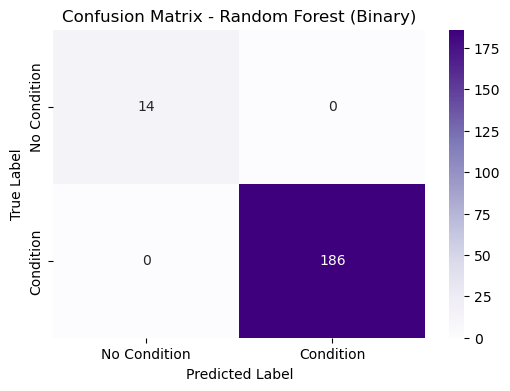

In [10]:
y_test_binary = (y_test > 0).astype(int)
y_pred_binary = (y_pred_rf > 0).astype(int)

# STEP 5: 2x2 Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["No Condition", "Condition"],
            yticklabels=["No Condition", "Condition"])

plt.title("Confusion Matrix - Random Forest (Binary)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 0: Scale the features (important for Logistic Regression)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# STEP 1: Train Logistic Regression
log_model = LogisticRegression(solver='lbfgs', max_iter=2000, random_state=42)
log_model.fit(x_train_scaled, y_train)

# STEP 2: Predict on test set
y_pred_log = log_model.predict(x_test_scaled)

# STEP 3: Evaluation Metrics
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, average='weighted')
recall_log = recall_score(y_test, y_pred_log, average='weighted')
f1_log = f1_score(y_test, y_pred_log, average='weighted')

print("📊 Logistic Regression Classifier Performance (Multi-class):")
print(f"Accuracy Score:  {accuracy_log:.4f}")
print(f"Precision Score: {precision_log:.4f}")
print(f"Recall Score:    {recall_log:.4f}")
print(f"F1 Score:        {f1_log:.4f}")

📊 Logistic Regression Classifier Performance (Multi-class):
Accuracy Score:  0.5700
Precision Score: 0.5766
Recall Score:    0.5700
F1 Score:        0.5655


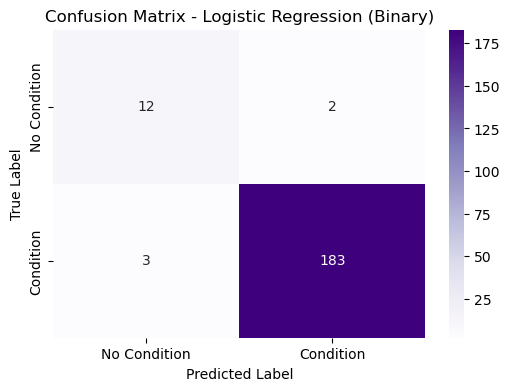

In [12]:
y_test_binary = (y_test > 0).astype(int)
y_pred_binary = (y_pred_log > 0).astype(int)

# STEP 5: 2x2 Confusion Matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["No Condition", "Condition"],
            yticklabels=["No Condition", "Condition"])

plt.title("Confusion Matrix - Logistic Regression (Binary)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# STEP 0: Scale features (important for KNN)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# STEP 1: Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # you can tune n_neighbors
knn_model.fit(x_train_scaled, y_train)

# STEP 2: Predict on test set
y_pred_knn = knn_model.predict(x_test_scaled)

# STEP 3: Evaluation Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("📊 K-Nearest Neighbors Classifier Performance (Multi-class):")
print(f"Accuracy Score:  {accuracy_knn:.4f}")
print(f"Precision Score: {precision_knn:.4f}")
print(f"Recall Score:    {recall_knn:.4f}")
print(f"F1 Score:        {f1_knn:.4f}")

📊 K-Nearest Neighbors Classifier Performance (Multi-class):
Accuracy Score:  0.2050
Precision Score: 0.2232
Recall Score:    0.2050
F1 Score:        0.2084


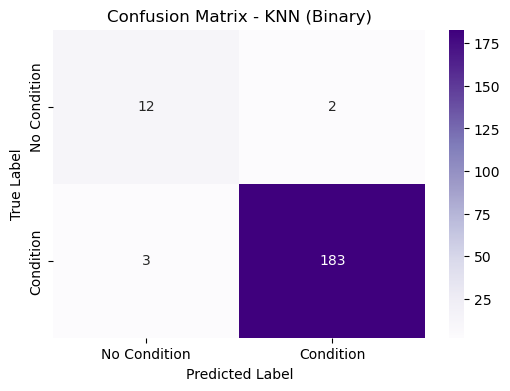

In [14]:
cm = confusion_matrix(y_test_binary, y_pred_binary)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Purples",
    xticklabels=["No Condition", "Condition"],
    yticklabels=["No Condition", "Condition"]
)

plt.title("Confusion Matrix - KNN (Binary)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression     0.570   0.576633   0.570  0.565505
1        Random Forest     0.985   0.985694   0.985  0.985020
2  K-Nearest Neighbors     0.205   0.223218   0.205  0.208395


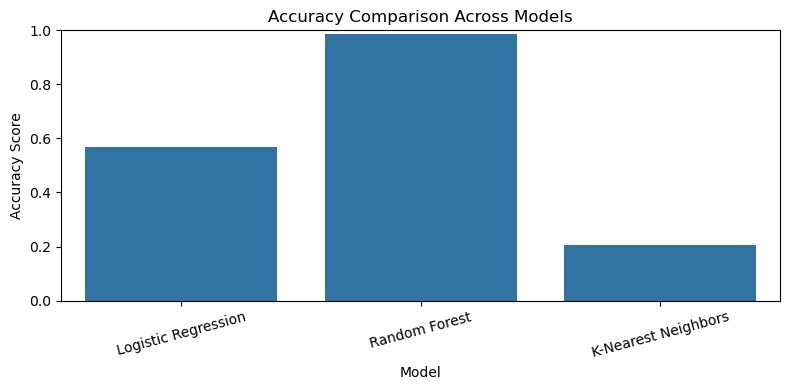

In [16]:
# Create a comparison table of metrics
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
    'Accuracy': [accuracy_log, accuracy_rf, accuracy_knn],
    'Precision': [precision_log, precision_rf, precision_knn],
    'Recall': [recall_log, recall_rf, recall_knn],
    'F1 Score': [f1_log, f1_rf, f1_knn]
})

# Display the table
print("\nModel Performance Comparison:")
print(results_df)

# Optional: Plot Accuracy for all models
plt.figure(figsize=(8, 4))
sns.barplot(data=results_df, x='Model', y='Accuracy')
plt.title('Accuracy Comparison Across Models')
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [17]:
# Identify the best model based on F1 Score
best_model_row = results_df.loc[results_df['F1 Score'].idxmax()]
best_model_name = best_model_row['Model']

print(f"\n✅ Best Performing Model Based on F1 Score: {best_model_name}")


✅ Best Performing Model Based on F1 Score: Random Forest


In [18]:
# Define performance interpretation
def interpret_performance(f1):
    if f1 < 0.70:
        return "Underfitting (Poor model)"
    elif f1 > 0.995:
        return "Overfitting (Too perfect, may not generalize)"
    else:
        return "Balanced (Good generalization)"

# Apply to each model
results_df['Interpretation'] = results_df['F1 Score'].apply(interpret_performance)

# Display again with interpretation
print("\n🧪 Model Evaluation Summary:")
print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Interpretation']])


🧪 Model Evaluation Summary:
                 Model  Accuracy  Precision  Recall  F1 Score  \
0  Logistic Regression     0.570   0.576633   0.570  0.565505   
1        Random Forest     0.985   0.985694   0.985  0.985020   
2  K-Nearest Neighbors     0.205   0.223218   0.205  0.208395   

                   Interpretation  
0       Underfitting (Poor model)  
1  Balanced (Good generalization)  
2       Underfitting (Poor model)  


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# ===== 2. Encode categorical variables =====
# This automatically one-hot encodes all categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# ===== 3. Define features & target =====
X = df_encoded.drop(columns=['User_ID', 'Mental_Health_Condition'], errors='ignore')
y = df_encoded['Mental_Health_Condition']

# ===== 4. Scale features =====
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

# ===== 5. Train/test split =====
x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ===== 6. Train Random Forest =====
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# ===== 7. Store feature names =====
feature_columns = X.columns.tolist()

print("✅ Random Forest model trained successfully!")
print("Number of features used:", len(feature_columns))


✅ Random Forest model trained successfully!
Number of features used: 24


In [23]:
# Create a dict with all feature names, fill missing ones with 0
sample_dict = {col: 0 for col in feature_columns}

# Fill in the known values (example)
sample_dict.update({
    'Age': 21,
    'Gender_Female': 1,
    'Occupation_Healthcare': 1,
    'Country_India': 1,      # pick one dummy column for country
    'Severity_Severe': 1,
    'Consultation_History': 1,
    'Stress_Level': 10,
    'Sleep_Hours': 2.0,
    'Work_Hours': 80,
    'Physical_Activity_Hours': 0
})

# Build dataframe in correct order
sample_input = pd.DataFrame([[sample_dict[col] for col in feature_columns]],
                            columns=feature_columns)

# Scale
scaled_sample = ss.transform(sample_input)

# Predict
prediction = rf_model.predict(scaled_sample)[0]

# Convert to Yes/No
result = "Yes" if prediction != 0 else "No"

print("🧠 Predicted Mental Health Condition:", result)


🧠 Predicted Mental Health Condition: No


In [25]:
sample_dict = {col: 0 for col in feature_columns}
sample_dict.update({
    'Age': 18, 'Gender_Female': 1, 'Occupation_Healthcare': 1, 'Country_India': 1,
    'Severity_Severe': 1, 'Consultation_History': 1, 'Stress_Level': 9,
    'Sleep_Hours': 3.0, 'Work_Hours': 75, 'Physical_Activity_Hours': 0
})
sample_input = pd.DataFrame([[sample_dict[col] for col in feature_columns]], columns=feature_columns)
scaled_sample = ss.transform(sample_input)
prediction = rf_model.predict(scaled_sample)[0]
print("🧠 Predicted Mental Health Condition:", "Yes" if prediction != 0 else "No")


🧠 Predicted Mental Health Condition: No


In [35]:
sample_dict = {col: 0 for col in feature_columns}
sample_dict.update({
    'Age': 25, 'Gender_Female': 0, 'Occupation_IT': 1, 'Country_USA': 1,
    'Severity_Mild': 1, 'Consultation_History': 0, 'Stress_Level': 4,
    'Sleep_Hours': 7.0, 'Work_Hours': 40, 'Physical_Activity_Hours': 3
})
sample_input = pd.DataFrame([[sample_dict[col] for col in feature_columns]], columns=feature_columns)
scaled_sample = ss.transform(sample_input)
prediction = rf_model.predict(scaled_sample)[0]
print("🧠 Predicted Mental Health Condition: →", "Yes" if prediction != 0 else "No")


🧠 Predicted Mental Health Condition: → Yes


In [36]:
sample_dict = {col: 0 for col in feature_columns}
sample_dict.update({
    'Age': 30, 'Gender_Female': 1, 'Occupation_Teacher': 1, 'Country_UK': 1,
    'Severity_Moderate': 1, 'Consultation_History': 1, 'Stress_Level': 6,
    'Sleep_Hours': 6.0, 'Work_Hours': 50, 'Physical_Activity_Hours': 2
})
sample_input = pd.DataFrame([[sample_dict[col] for col in feature_columns]], columns=feature_columns)
scaled_sample = ss.transform(sample_input)
prediction = rf_model.predict(scaled_sample)[0]
print("🧠 Predicted Mental Health Condition:", "Yes" if prediction != 0 else "No")


🧠 Predicted Mental Health Condition: Yes


In [37]:
sample_dict = {col: 0 for col in feature_columns}
sample_dict.update({
    'Age': 22, 'Gender_Female': 0, 'Occupation_Student': 1, 'Country_India': 1,
    'Severity_Severe': 1, 'Consultation_History': 1, 'Stress_Level': 10,
    'Sleep_Hours': 2.5, 'Work_Hours': 70, 'Physical_Activity_Hours': 0
})
sample_input = pd.DataFrame([[sample_dict[col] for col in feature_columns]], columns=feature_columns)
scaled_sample = ss.transform(sample_input)
prediction = rf_model.predict(scaled_sample)[0]
print("🧠 Predicted Mental Health Condition: →", "Yes" if prediction != 0 else "No")


🧠 Predicted Mental Health Condition: → No


In [38]:
sample_dict = {col: 0 for col in feature_columns}
sample_dict.update({
    'Age': 40, 'Gender_Female': 1, 'Occupation_Doctor': 1, 'Country_Canada': 1,
    'Severity_Moderate': 1, 'Consultation_History': 0, 'Stress_Level': 5,
    'Sleep_Hours': 6.5, 'Work_Hours': 45, 'Physical_Activity_Hours': 2
})
sample_input = pd.DataFrame([[sample_dict[col] for col in feature_columns]], columns=feature_columns)
scaled_sample = ss.transform(sample_input)
prediction = rf_model.predict(scaled_sample)[0]
print("🧠 Predicted Mental Health Condition: →", "Yes" if prediction != 0 else "No")


🧠 Predicted Mental Health Condition: → Yes


In [39]:
sample_dict = {col: 0 for col in feature_columns}
sample_dict.update({
    'Age': 35, 'Gender_Female': 0, 'Occupation_Engineer': 1, 'Country_USA': 1,
    'Severity_Mild': 1, 'Consultation_History': 0, 'Stress_Level': 3,
    'Sleep_Hours': 8.0, 'Work_Hours': 38, 'Physical_Activity_Hours': 4
})
sample_input = pd.DataFrame([[sample_dict[col] for col in feature_columns]], columns=feature_columns)
scaled_sample = ss.transform(sample_input)
prediction = rf_model.predict(scaled_sample)[0]
print("🧠 Predicted Mental Health Condition: →", "Yes" if prediction != 0 else "No")


🧠 Predicted Mental Health Condition: → No


In [40]:
sample_dict = {col: 0 for col in feature_columns}
sample_dict.update({
    'Age': 28, 'Gender_Female': 1, 'Occupation_Healthcare': 1, 'Country_UK': 1,
    'Severity_Severe': 1, 'Consultation_History': 1, 'Stress_Level': 8,
    'Sleep_Hours': 4.5, 'Work_Hours': 65, 'Physical_Activity_Hours': 1
})
sample_input = pd.DataFrame([[sample_dict[col] for col in feature_columns]], columns=feature_columns)
scaled_sample = ss.transform(sample_input)
prediction = rf_model.predict(scaled_sample)[0]
print("🧠 Predicted Mental Health Condition: →", "Yes" if prediction != 0 else "No")


🧠 Predicted Mental Health Condition: → No


In [41]:
sample_dict = {col: 0 for col in feature_columns}
sample_dict.update({
    'Age': 50, 'Gender_Female': 0, 'Occupation_Teacher': 1, 'Country_India': 1,
    'Severity_Mild': 1, 'Consultation_History': 0, 'Stress_Level': 2,
    'Sleep_Hours': 7.5, 'Work_Hours': 30, 'Physical_Activity_Hours': 3
})
sample_input = pd.DataFrame([[sample_dict[col] for col in feature_columns]], columns=feature_columns)
scaled_sample = ss.transform(sample_input)
prediction = rf_model.predict(scaled_sample)[0]
print("🧠 Predicted Mental Health Condition: →", "Yes" if prediction != 0 else "No")


🧠 Predicted Mental Health Condition: → No


In [42]:
sample_dict = {col: 0 for col in feature_columns}
sample_dict.update({
    'Age': 29, 'Gender_Female': 1, 'Occupation_IT': 1, 'Country_Canada': 1,
    'Severity_Moderate': 1, 'Consultation_History': 1, 'Stress_Level': 7,
    'Sleep_Hours': 5.0, 'Work_Hours': 55, 'Physical_Activity_Hours': 2
})
sample_input = pd.DataFrame([[sample_dict[col] for col in feature_columns]], columns=feature_columns)
scaled_sample = ss.transform(sample_input)
prediction = rf_model.predict(scaled_sample)[0]
print("🧠 Predicted Mental Health Condition: →", "Yes" if prediction != 0 else "No")


🧠 Predicted Mental Health Condition: → Yes


In [43]:
sample_dict = {col: 0 for col in feature_columns}
sample_dict.update({
    'Age': 45, 'Gender_Female': 0, 'Occupation_Engineer': 1, 'Country_USA': 1,
    'Severity_Severe': 1, 'Consultation_History': 1, 'Stress_Level': 9,
    'Sleep_Hours': 4.0, 'Work_Hours': 60, 'Physical_Activity_Hours': 0
})
sample_input = pd.DataFrame([[sample_dict[col] for col in feature_columns]], columns=feature_columns)
scaled_sample = ss.transform(sample_input)
prediction = rf_model.predict(scaled_sample)[0]
print("🧠 Predicted Mental Health Condition:0 →", "Yes" if prediction != 0 else "No")


🧠 Predicted Mental Health Condition:0 → Yes
